In [9]:
import pandas as pd

academic_performance = pd.read_csv('enhanced_student_habits_performance_dataset.csv')

# añadir variables creadas anteriormente
academic_performance['study_hours_per_screen_time_hours_ratio'] = academic_performance['study_hours_per_day'] / academic_performance['screen_time']
academic_performance['study_hours_per_motivation_level_ratio'] = academic_performance['study_hours_per_day'] / academic_performance['motivation_level']

academic_performance.head()


,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score,study_hours_per_screen_time_hours_ratio,study_hours_per_motivation_level_ratio
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,Yes,High,9,7,8,Reading,3.0,100,0.701410,1.092195
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,Yes,Low,7,2,10,Reading,6.0,99,0.686747,2.850000
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,Yes,High,3,9,6,Kinesthetic,7.6,98,0.300000,0.266667
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,Yes,Low,5,3,10,Reading,3.2,100,0.290598,1.133333
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,Yes,Medium,9,1,10,Reading,7.1,98,0.500000,4.700000


In [10]:
# selección univariada
# para escoger las k variables con mejores metricas individuales
# para calcular el f score para saber cuanto varía la variable objetivo al dividir los datos segun cada caracteristica
from sklearn.feature_selection import SelectKBest, f_regression

# variables predictoras objetivo
X = academic_performance[['study_hours_per_screen_time_hours_ratio', 'study_hours_per_motivation_level_ratio',
                          'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'sleep_hours',
                          'exercise_frequency', 'stress_level', 'screen_time',
                          'motivation_level', 'exam_anxiety_score', 'time_management_score',]] # matriz de caracteristicas candidatas
y = academic_performance['exam_score'] # como vector objetivo

# seleccionar las 2 mejores variables
selector = SelectKBest(score_func=f_regression, k=2) # usa el f score para medir correlacion de cada variable con respecto a y (goles local)
selector.fit(X, y) # permite calcular internamente la media y varianza de y en cada particion de X para obtener el f score

# cuanto más alto el puntaje mayor la asosiación lineal con y
# resultados ordenados por relevancia
scores = selector.scores_
variables = X.columns

# ordenar y crear un frame para visualizar que variables destacan
resultados = pd.DataFrame({'Variable': variables, 'Score': scores}).sort_values(by='Score', ascending=False)
resultados

,Variable,Score
9,motivation_level,5346.291840
2,study_hours_per_day,4952.896469
10,exam_anxiety_score,4714.517480
0,study_hours_per_screen_time_hours_ratio,3252.340084
8,screen_time,2374.646596
7,stress_level,1140.321670
5,sleep_hours,665.337793
6,exercise_frequency,609.881939
1,study_hours_per_motivation_level_ratio,146.443011
3,social_media_hours,3.226609


In [11]:
# evaluar la importancia con un arbol de desición
from sklearn.tree import DecisionTreeRegressor # modelo que capta relaciones no lineales e interacciones

# Entrenar arbol de desición para medir la importancia
modelo_arbol = DecisionTreeRegressor(random_state=42) # instaciamos el arbol, un random state que fija la aleatoriedad para que los resultados sean reproducible
modelo_arbol.fit(X, y) # se encarga de dividir recursivamente X para minimizar el error cuadratico medio en y

# importancia calculada por el modelo
importancia = modelo_arbol.feature_importances_ # proporción de reducción total de impurezas o error que se atribuye a cada variable
# cuanto mayor el valor más influyente es esa característica en las desiciones del arbol

# ordenar para comparar la importancia relativa de cada variable segun el arbol
resultado_importancia = pd.DataFrame({
  'Variable': variables,
  'Importancia': importancia,
}).sort_values(by='Importancia', ascending=False)

resultado_importancia

,Variable,Importancia
2,study_hours_per_day,0.115847
11,time_management_score,0.115142
7,stress_level,0.107733
5,sleep_hours,0.104658
0,study_hours_per_screen_time_hours_ratio,0.097794
4,netflix_hours,0.093994
3,social_media_hours,0.091078
8,screen_time,0.086603
1,study_hours_per_motivation_level_ratio,0.070490
10,exam_anxiety_score,0.056989


C:\Users\Antel\AppData\Local\Temp\ipykernel_15644\2891306220.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Variable', data = resultados, ax=ax[0], palette='Blues_r') # f score de skb
C:\Users\Antel\AppData\Local\Temp\ipykernel_15644\2891306220.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data = resultado_importancia, ax=ax[1], palette='Greens_r') # f score de skb


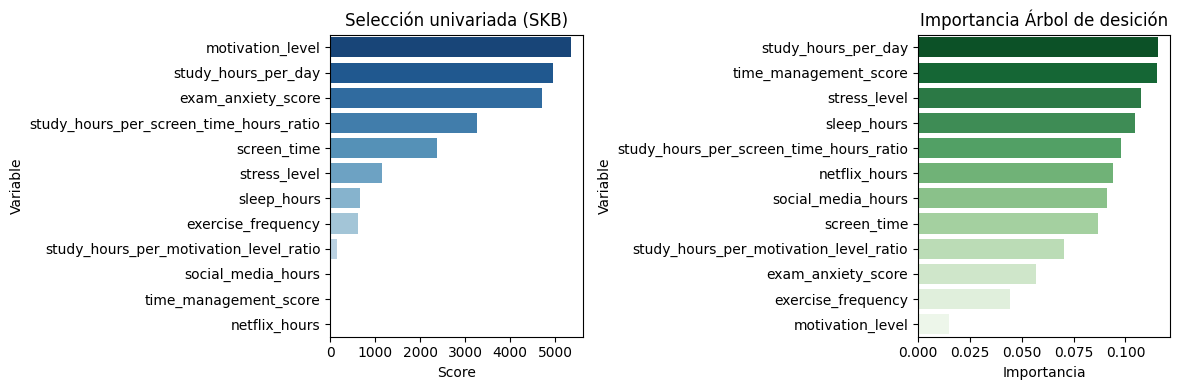

In [12]:
# visualizacion comparativa de ambas tecnicas
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Gráfica SelectKBest (análsis univariado)
sns.barplot(x='Score', y='Variable', data = resultados, ax=ax[0], palette='Blues_r') # f score de skb
ax[0].set_title('Selección univariada (SKB)')

# Gráfica importancia (árbol desición)
sns.barplot(x='Importancia', y='Variable', data = resultado_importancia, ax=ax[1], palette='Greens_r') # f score de skb
ax[1].set_title('Importancia Árbol de desición')

plt.tight_layout()
plt.show()